## Load repo [repo](https://github.com/nicknochnack/YOLO-Drowsiness-Detection/blob/main/Drowsiness%20Detection%20Tutorial.ipynb)

In [13]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 8731, done.
remote: Counting objects: 100% (445/445), done.
remote: Compressing objects: 100% (270/270), done.
remote: Total 8731 (delta 283), reused 294 (delta 175), pack-reused 8286
Receiving objects: 100% (8731/8731), 9.67 MiB | 8.26 MiB/s, done.
Resolving deltas: 100% (6023/6023), done.


In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

## Load Model

In [2]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')
model

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /root/.cache/torch/hub/master.zip


requirements: PyYAML>=5.3.1 not found and is required by YOLOv5, attempting auto-update...


YOLOv5 🚀 2021-8-5 torch 1.9.0+cu102 CPU



  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13

requirements: 1 package updated per /root/.cache/torch/hub/ultralytics_yolov5_master/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect



Fusing layers... 


Model Summary: 224 layers, 7266973 parameters, 0 gradients
Adding AutoShape... 


AutoShape(
  (model): Model(
    (model): Sequential(
      (0): Focus(
        (conv): Conv(
          (conv): Conv2d(12, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
      )
      (1): Conv(
        (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (act): SiLU(inplace=True)
      )
      (2): C3(
        (cv1): Conv(
          (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (cv3): Conv(
          (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (m): Sequential(
          (0): Bottleneck(
            (cv1): Conv(
              (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
              (act): SiLU(inplace=True)
            )
    

## Make Detections with Images - on coco dataset


In [3]:
img = 'https://images.unsplash.com/photo-1547425260-76bcadfb4f2c?ixid=MnwxMjA3fDB8MHxzZWFyY2h8M3x8cGVyc29ufGVufDB8fDB8fA%3D%3D&ixlib=rb-1.2.1&w=1000&q=80'

In [4]:
results = model(img)
results.print()

image 1/1: 667x1000 1 person, 1 tie
Speed: 188.8ms pre-process, 393.2ms inference, 19.5ms NMS per image at shape (1, 3, 448, 640)


In [26]:
# results.render()

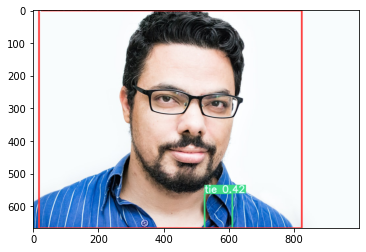

In [5]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

## Real Time Detections

In [18]:
# from google.colab.patches import cv2_imshow
# cap = cv2.VideoCapture('/content/drive/MyDrive/Colab Notebooks/YOLO/MUMBAI TRAFFIC _ INDIA.mp4')
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()